In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set 1

## load and explore the data set

In [3]:
# load the data
data_test = pd.read_csv('../data/datatest.csv', index_col = 0)
data_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,02/02/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
141,02/02/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
142,02/02/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
143,02/02/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
144,02/02/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
# check df shape
data_test.shape

(2665, 7)

In [5]:
# check indexes
data_test.index

Int64Index([ 140,  141,  142,  143,  144,  145,  146,  147,  148,  149,
            ...
            2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804],
           dtype='int64', length=2665)

In [6]:
# check the data types
data_test.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [7]:
# convert date column to date data type
data_test['date'] = pd.to_datetime(data_test['date'])
data_test.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [10]:
# general overview
data_test.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [11]:
# check the total records of occupancy
data_test['Occupancy'].value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

In [12]:
# check for duplicates
data_test.date.duplicated().sum()

534

In [13]:
# check the duplicated rows
data_test[data_test.date.duplicated()]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
141,2015-02-02 14:19:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
145,2015-02-02 14:23:00,23.760000,26.260000,568.666667,790.000000,0.004779,1
147,2015-02-02 14:25:00,23.754000,26.290000,509.000000,797.000000,0.004783,1
153,2015-02-02 14:31:00,23.700000,26.700000,469.000000,845.333333,0.004842,1
160,2015-02-02 14:38:00,23.640000,27.100000,473.000000,908.800000,0.004898,1
166,2015-02-02 14:44:00,23.625000,27.392500,498.666667,961.000000,0.004946,1
173,2015-02-02 14:51:00,23.600000,27.540000,512.000000,992.600000,0.004966,1
177,2015-02-02 14:55:00,23.600000,27.700000,483.166667,1009.500000,0.004995,1
179,2015-02-02 14:57:00,23.600000,27.790000,473.000000,1021.000000,0.005011,1
186,2015-02-02 15:04:00,23.500000,27.978000,454.000000,1055.250000,0.005015,1


In [ ]:
data

In [21]:
'''
the records are from the same day but different time
'''

'\nthe records are from the same day but different time\n'

In [29]:
# check the date column range
print(data_test['date'].min())
print(data_test['date'].max())

02/02/2015 14:19
04/02/2015 10:43


In [33]:
# set date to index
data_test_dateidx = data_test.set_index('date')
data_test_dateidx.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [34]:
# check the index
data_test_dateidx.index

DatetimeIndex(['2015-02-02 14:19:00', '2015-02-02 14:19:00',
               '2015-02-02 14:21:00', '2015-02-02 14:22:00',
               '2015-02-02 14:23:00', '2015-02-02 14:23:00',
               '2015-02-02 14:25:00', '2015-02-02 14:25:00',
               '2015-02-02 14:26:00', '2015-02-02 14:28:00',
               ...
               '2015-04-02 10:34:00', '2015-04-02 10:34:00',
               '2015-04-02 10:36:00', '2015-04-02 10:37:00',
               '2015-04-02 10:38:00', '2015-04-02 10:38:00',
               '2015-04-02 10:40:00', '2015-04-02 10:40:00',
               '2015-04-02 10:41:00', '2015-04-02 10:43:00'],
              dtype='datetime64[ns]', name='date', length=2665, freq=None)

In [35]:
# checking for missing values
data_test_dateidx.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

## Evaluate the correlatation

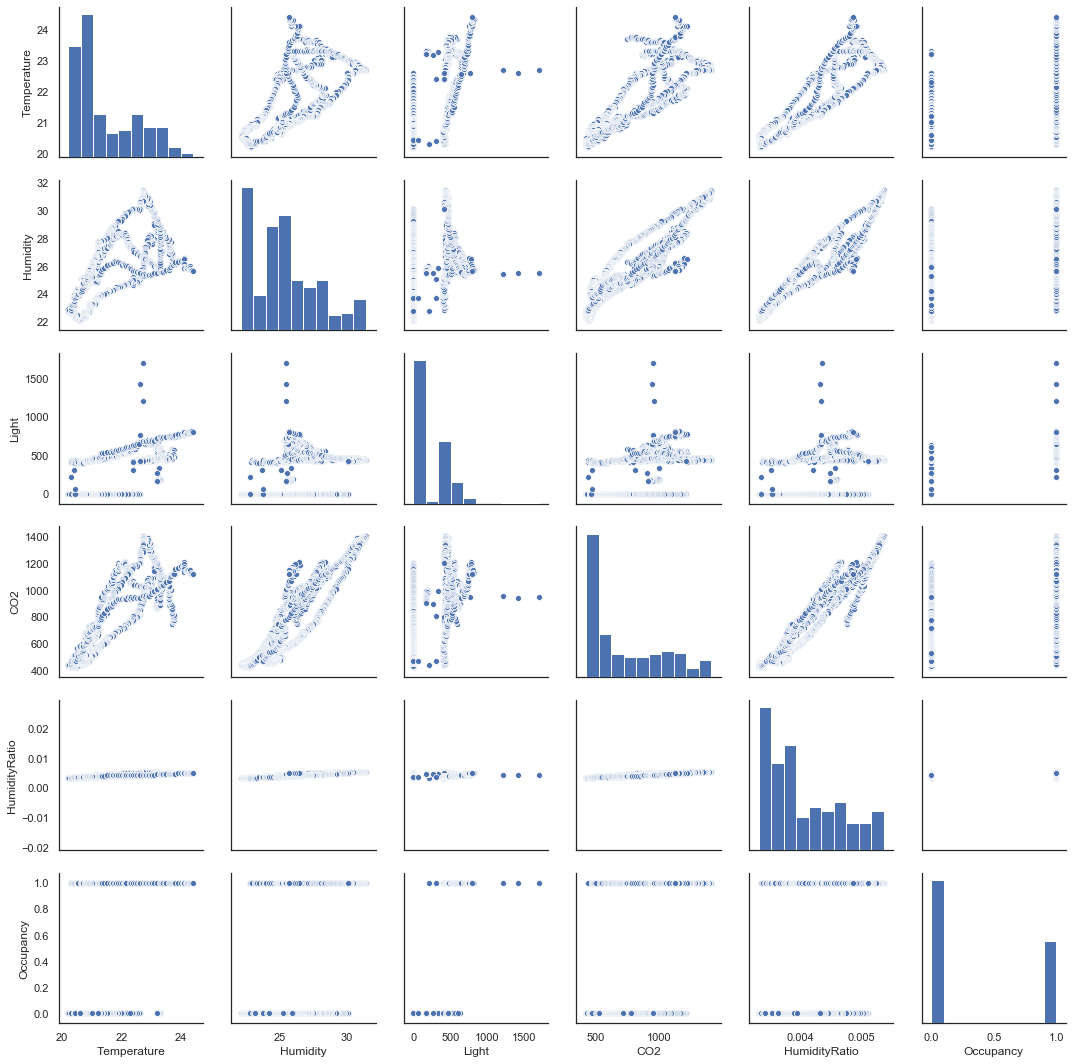

In [49]:
# create pairplot
import seaborn as sns
sns.pairplot(data_test_dateidx)
plt.show()

In [44]:
# create correlation matrix
data_test_dateidx_corr = data_test_dateidx.corr()
corr_mask = abs(data_test_dateidx.corr()) > 0.5
data_test_dateidx_corr[corr_mask]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


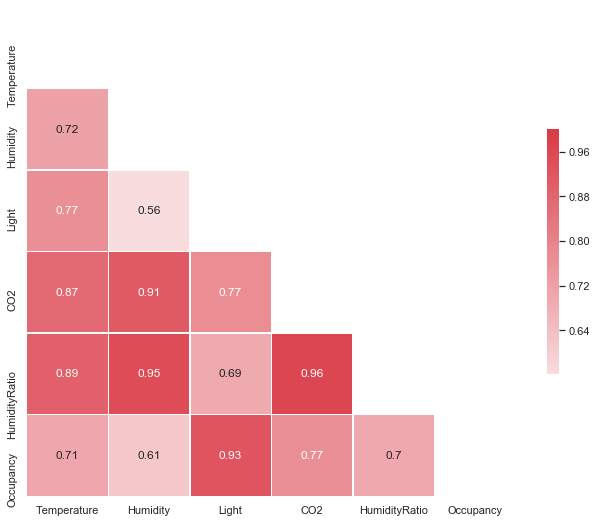

In [50]:
# create heatmap
sns.set(style="white")

# generate a mask for the upper triangle
mask = np.zeros_like(data_test_dateidx_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap = True)

# draw the heatmap with the mask and correct aspect ration
sns.heatmap(data_test_dateidx_corr, mask = mask, cmap = cmap, center = 0.5,
           annot = True, square = True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

In [51]:
'''
light is the one more correlated with occupancy
'''

'\nlight is the one more correlated with occupancy\n'

In [52]:
data_test_dateidx.to_csv('../data/dataset1.csv')

'date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy\r\n2015-02-02 14:19:00,23.7,26.272,585.2,749.2,0.004764163,1\r\n2015-02-02 14:19:00,23.718000000000004,26.29,578.4,760.4,0.004772661,1\r\n2015-02-02 14:21:00,23.73,26.23,572.6666667000001,769.6666667000001,0.004765153,1\r\n2015-02-02 14:22:00,23.7225,26.125,493.75,774.75,0.004743773,1\r\n2015-02-02 14:23:00,23.754,26.2,488.6,779.0,0.004766594,1\r\n2015-02-02 14:23:00,23.76,26.26,568.6666667000001,790.0,0.004779332,1\r\n2015-02-02 14:25:00,23.73,26.29,536.3333333,798.0,0.004776135999999999,1\r\n2015-02-02 14:25:00,23.754,26.29,509.0,797.0,0.004783094,1\r\n2015-02-02 14:26:00,23.754,26.35,476.0,803.2,0.0047940940000000005,1\r\n2015-02-02 14:28:00,23.736,26.39,510.0,809.0,0.004796189,1\r\n2015-02-02 14:29:00,23.745,26.445,481.5,815.25,0.004808886,1\r\n2015-02-02 14:30:00,23.7,26.56,481.8,824.0,0.004816793,1\r\n2015-02-02 14:31:00,23.7,26.6,475.25,832.0,0.004824104,1\r\n2015-02-02 14:31:00,23.7,26.7,469.0,845.3333332999998,0.0048